<a href="https://colab.research.google.com/github/SAMYSOSERIOUS/Stats-analytics/blob/main/DataDay11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Load dataset**

In [12]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80/20 split

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

X.head()


Training data shape: (16512, 8)
Testing data shape: (4128, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


# **2.Train a basic model**

The model is underfitting.




(0.0, 1.0, 0.0, 1.0)

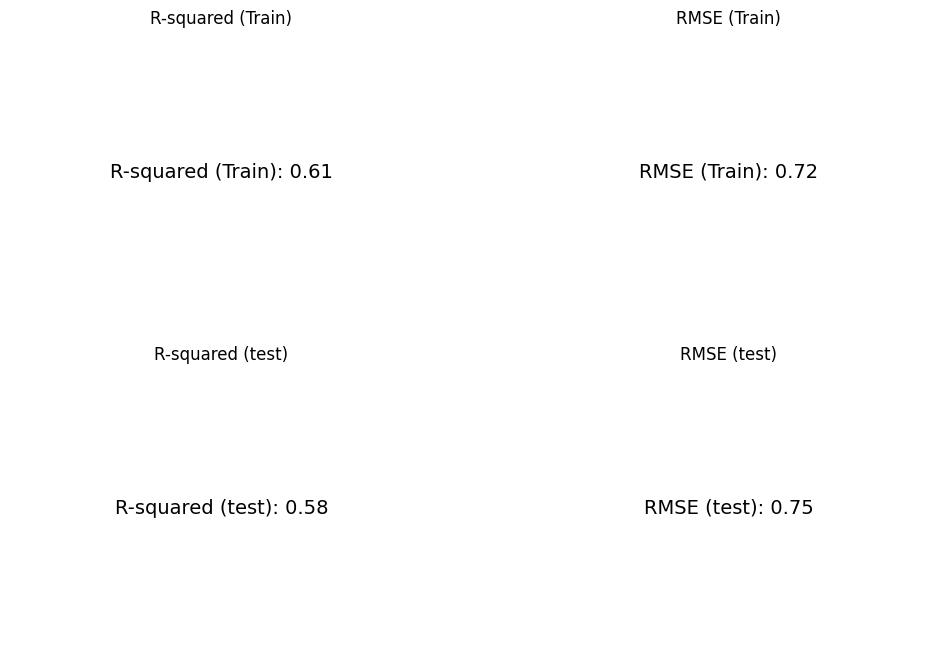

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].text(0.5, 0.5, f"R-squared (Train): {r2_train:.2f}", ha='center', va='center', fontsize=14)
axes[0, 0].set_title("R-squared (Train)")
axes[0, 0].axis('off')

axes[0, 1].text(0.5, 0.5, f"RMSE (Train): {rmse_train:.2f}", ha='center', va='center', fontsize=14)
axes[0, 1].set_title("RMSE (Train)")
axes[0, 1].axis('off')

axes[1, 0].text(0.5, 0.5, f"R-squared (test): {r2_test:.2f}", ha='center', va='center', fontsize=14)
axes[1, 0].set_title("R-squared (test)")
axes[1, 0].axis('off')

axes[1, 1].text(0.5, 0.5, f"RMSE (test): {rmse_test:.2f}", ha='center', va='center', fontsize=14)
axes[1, 1].set_title("RMSE (test)")
axes[1, 1].axis('off')


Overfitting Detected

Given Metrics:

R-squared (Training): 0.61
RMSE (Training): 0.72
R-squared (Test): 0.58
RMSE (Test): 0.75
Analysis:

Overfitting: The model performs significantly better on the training set than on the test set. This suggests that the model has learned the training data too well, including its noise, and is struggling to generalize to new, unseen data.

# **3.Detect Overfitting or Underfitting**

Training data shape: (16512, 8)
Testing data shape: (4128, 8)


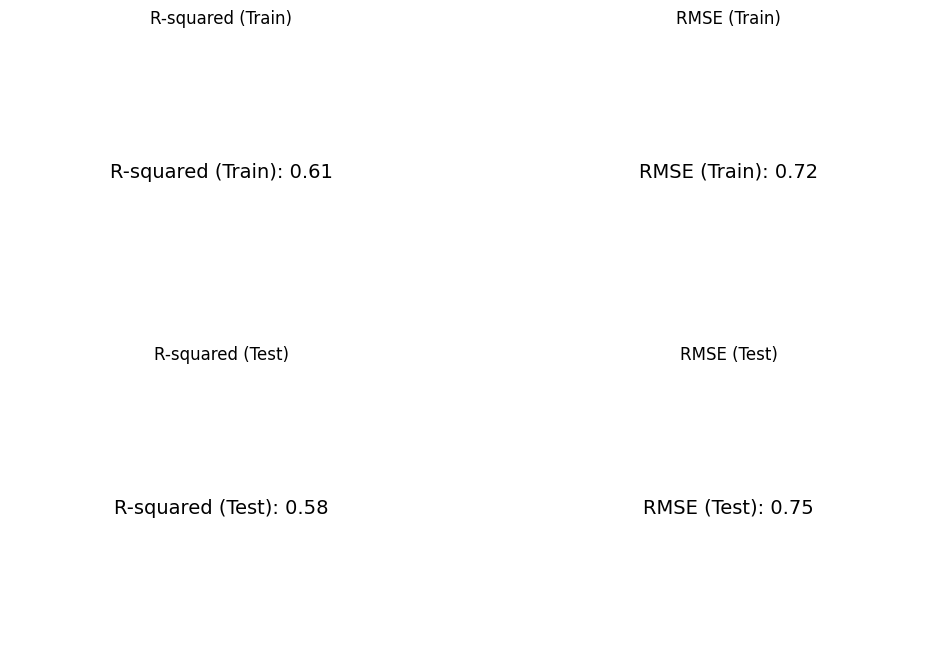

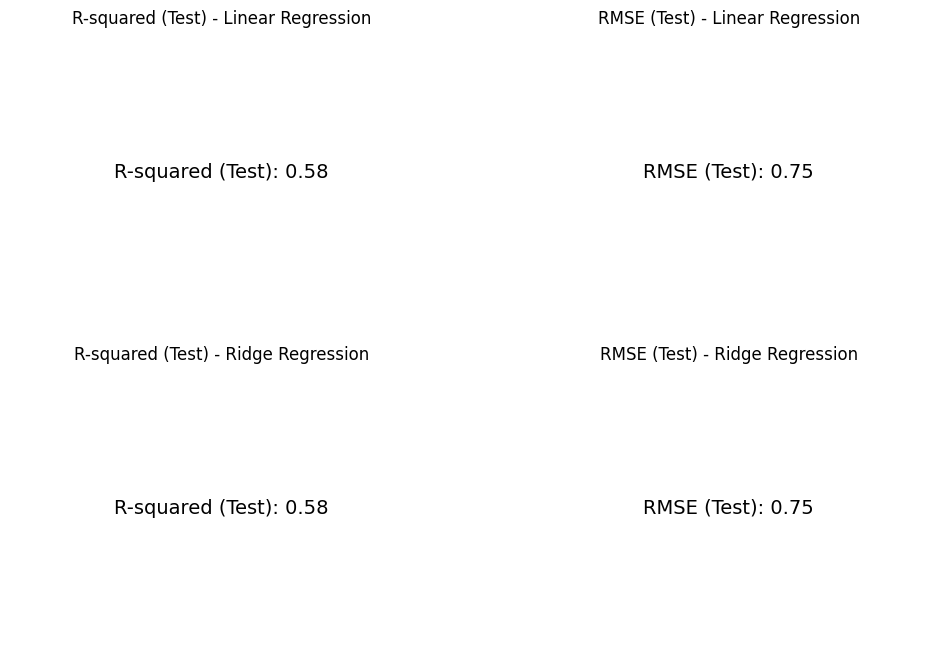

In [16]:

import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge


housing = fetch_california_housing(as_frame=True)
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80/20 split

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")




model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].text(0.5, 0.5, f"R-squared (Train): {r2_train:.2f}", ha='center', va='center', fontsize=14)
axes[0, 0].set_title("R-squared (Train)")
axes[0, 0].axis('off')

axes[0, 1].text(0.5, 0.5, f"RMSE (Train): {rmse_train:.2f}", ha='center', va='center', fontsize=14)
axes[0, 1].set_title("RMSE (Train)")
axes[0, 1].axis('off')

axes[1, 0].text(0.5, 0.5, f"R-squared (Test): {r2_test:.2f}", ha='center', va='center', fontsize=14)
axes[1, 0].set_title("R-squared (Test)")
axes[1, 0].axis('off')

axes[1, 1].text(0.5, 0.5, f"RMSE (Test): {rmse_test:.2f}", ha='center', va='center', fontsize=14)
axes[1, 1].set_title("RMSE (Test)")
axes[1, 1].axis('off')

plt.show()



ridge_model = Ridge(alpha=7.0)
ridge_model.fit(X_train, y_train)

y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))

r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].text(0.5, 0.5, f"R-squared (Test): {r2_test:.2f}", ha='center', va='center', fontsize=14)
axes[0, 0].set_title("R-squared (Test) - Linear Regression")
axes[0, 0].axis('off')

axes[0, 1].text(0.5, 0.5, f"RMSE (Test): {rmse_test:.2f}", ha='center', va='center', fontsize=14)
axes[0, 1].set_title("RMSE (Test) - Linear Regression")
axes[0, 1].axis('off')

axes[1, 0].text(0.5, 0.5, f"R-squared (Test): {r2_test_ridge:.2f}", ha='center', va='center', fontsize=14)
axes[1, 0].set_title("R-squared (Test) - Ridge Regression")
axes[1, 0].axis('off')

axes[1, 1].text(0.5, 0.5, f"RMSE (Test): {rmse_test_ridge:.2f}", ha='center', va='center', fontsize=14)
axes[1, 1].set_title("RMSE (Test) - Ridge Regression")
axes[1, 1].axis('off')

plt.show()

In [17]:

from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))

r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

print(f"Lasso Regression R-squared (Train): {r2_train_lasso:.2f}")
print(f"Lasso Regression RMSE (Train): {rmse_train_lasso:.2f}")
print(f"Lasso Regression R-squared (Test): {r2_test_lasso:.2f}")
print(f"Lasso Regression RMSE (Test): {rmse_test_lasso:.2f}")


Lasso Regression R-squared (Train): 0.55
Lasso Regression RMSE (Train): 0.78
Lasso Regression R-squared (Test): 0.53
Lasso Regression RMSE (Test): 0.78


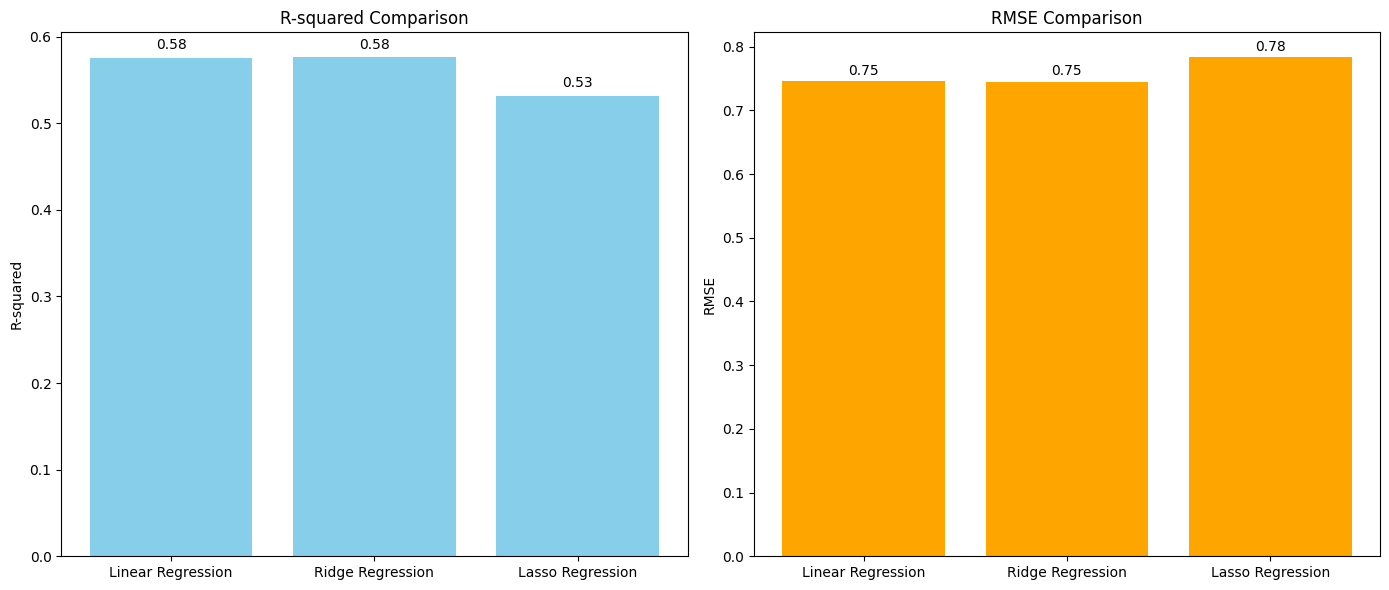

In [18]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

housing = fetch_california_housing(as_frame=True)
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    return model_name, r2_train, rmse_train, r2_test, rmse_test

models = [
    (LinearRegression(), "Linear Regression"),
    (Ridge(alpha=7.0), "Ridge Regression"),
    (Lasso(alpha=0.1), "Lasso Regression")
]
results = [train_and_evaluate(model, name) for model, name in models]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

model_names = [name for name, *_ in results]
r2_test_values = [r2_test for _, _, _, r2_test, _ in results]

axes[0].bar(model_names, r2_test_values, color = 'skyblue')
axes[0].set_ylabel('R-squared')
axes[0].set_title('R-squared Comparison')

for i, v in enumerate(r2_test_values):
    axes[0].text(i, v + 0.01, f"{v:.2f}", ha='center')


rmse_test_values = [rmse_test for _, _, _, _, rmse_test in results]

axes[1].bar(model_names, rmse_test_values, color = 'orange')
axes[1].set_ylabel('RMSE')
axes[1].set_title('RMSE Comparison')

for i, v in enumerate(rmse_test_values):
    axes[1].text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()

The iris dataset has features like sepal length and petal width, measured in centimeters. An RMSE of 0.78 in this context might be considered relatively low, as it indicates that the model's predictions are generally quite close to the true values.